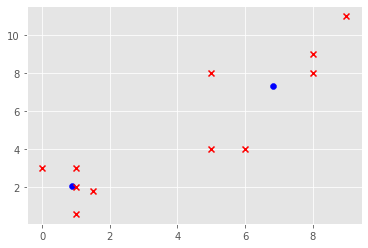

0
0
1
1
0
1
0
1
0
1
1


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
style.use("ggplot")

v = np.array([[1, 2],
             [1.5, 1.8],
             [5, 8],
              [8, 8],
             [1, 0.6],
             [9,11],
             [1,3],
             [8,9],
             [0,3],
             [5,4],
             [6,4],])

class K_Means:
  def __init__(self, k=2, tol=0.002, max_iter=300):
    self.k = k
    self.tol = tol
    self.max_iter = max_iter

  def fit(self, data):
    self.centroids = {}

    for i in range(self.k):
      self.centroids[i] = data[i]

    for i in range(self.max_iter):
      self.classifications = {}

      for i in range(self.k):
        self.classifications[i] = []

      for featureset in data:
        distances = [np.linalg.norm(featureset-self.centroids[center]) for center in self.centroids]
        classification = distances.index(min(distances))
        self.classifications[classification].append(featureset)

      prev_centroids = dict(self.centroids)

      for classification in self.classifications:
        self.centroids[classification] = np.average(self.classifications[classification],axis=0)

      optimized = True

      for b in self.centroids:
        original_centroid = prev_centroids[b]
        current_centroid = self.centroids[b]
        if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
          optimized = False

      if optimized:
        break

  def predict(self,item):
    distances = [np.linalg.norm(item-self.centroids[i]) for i in self.centroids]
    classification = distances.index(min(distances))
    return classification
  
myclf = K_Means()
myclf.fit(v)

for centroid in myclf.centroids:
  plt.scatter(myclf.centroids[centroid][0], myclf.centroids[centroid][1], marker="o", color="b")

for classification in myclf.classifications:
  for featureset in myclf.classifications[classification]:
    plt.scatter(featureset[0],featureset[1],marker = "x", color = "r")

plt.show()

for item in v:
  print (myclf.predict(item))